In [8]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats
import matplotlib.pyplot as plt


%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

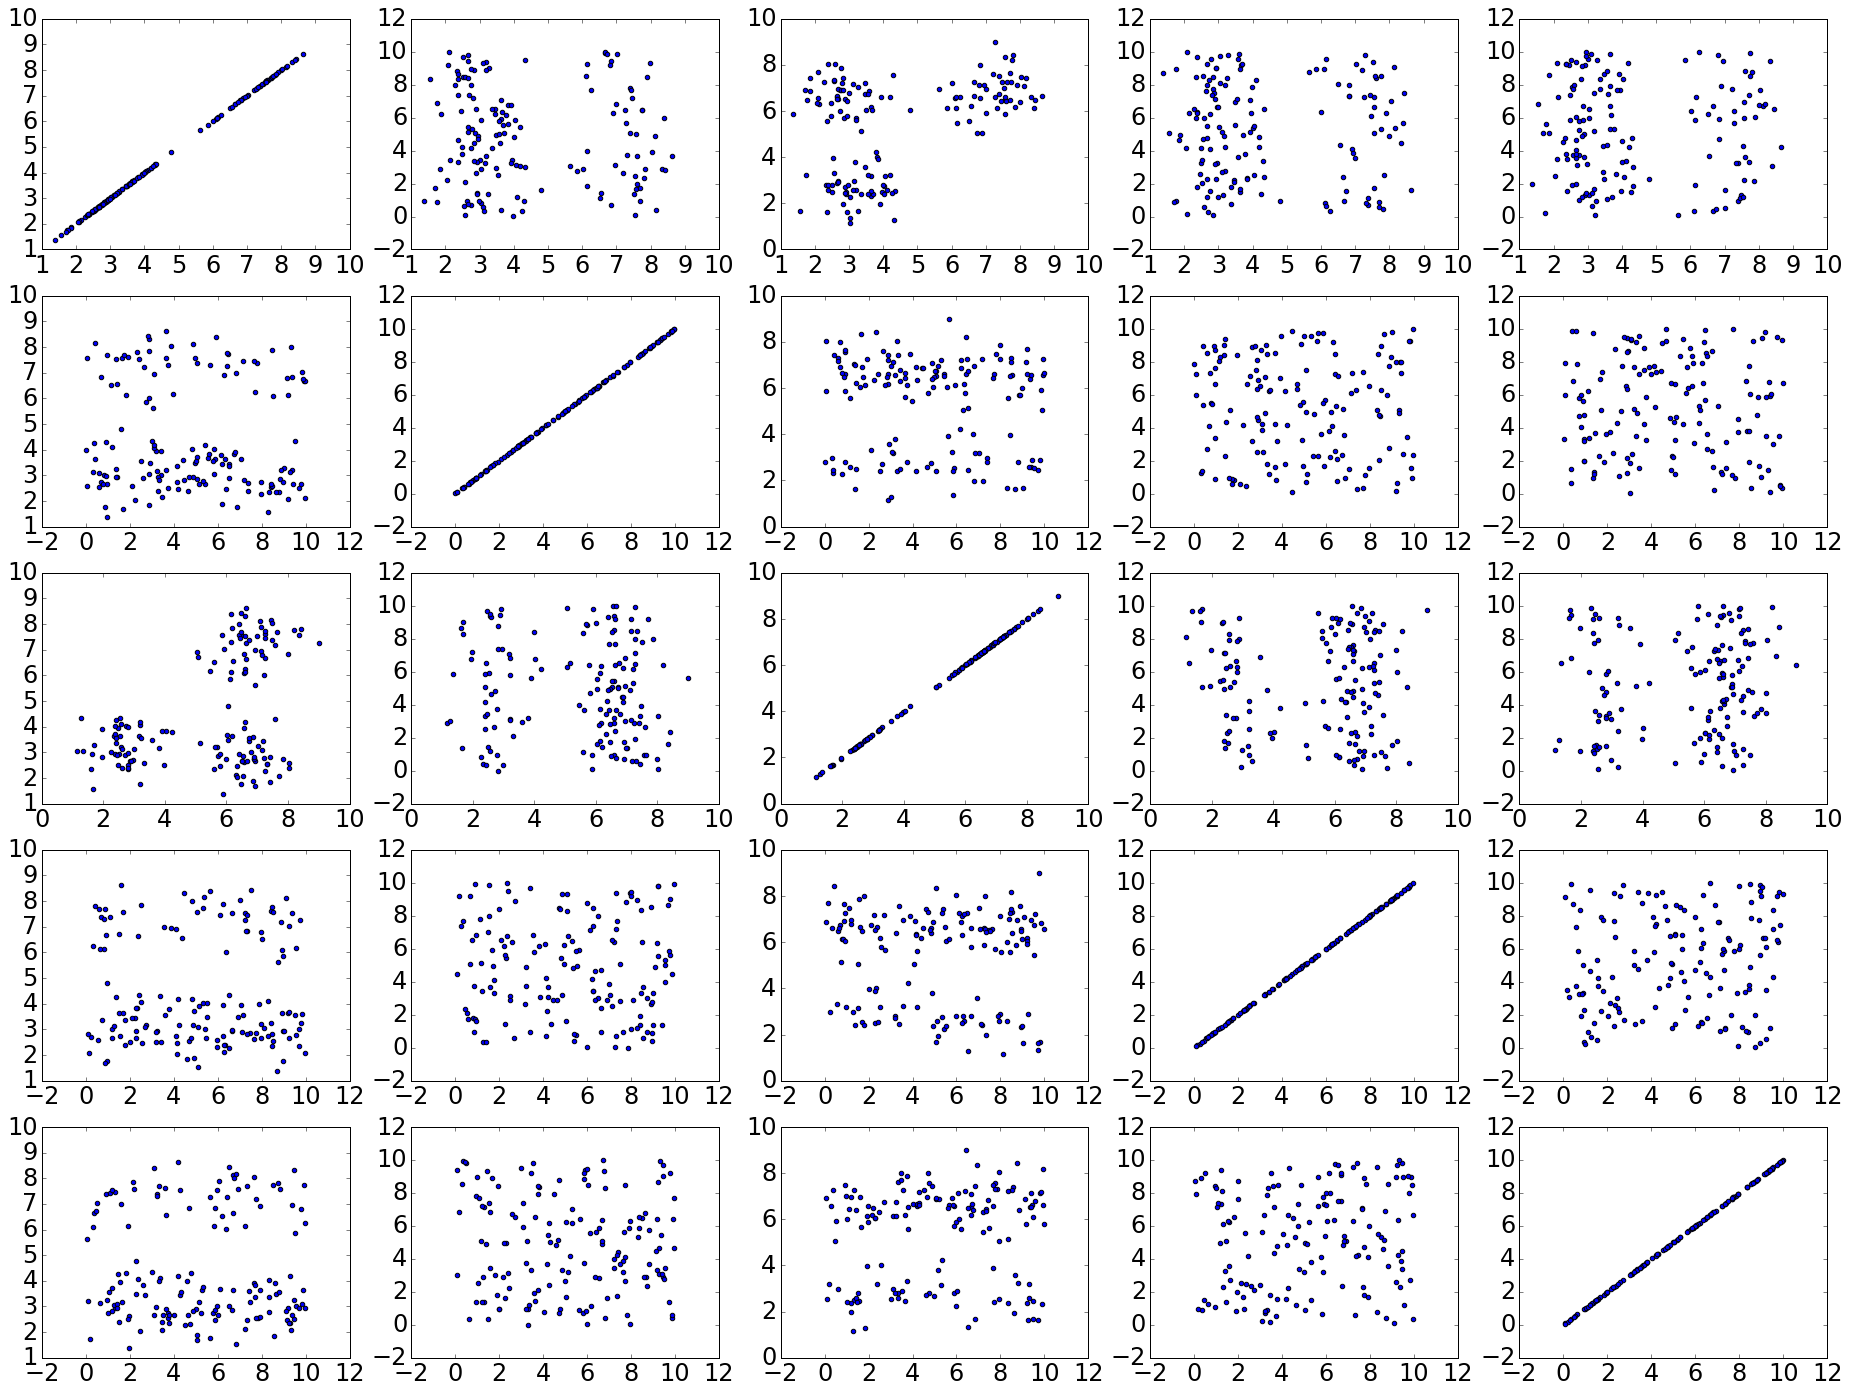

In [9]:
def plotmatrix(Matrix):
  r, c = Matrix.shape
  fig = plt.figure()
  plotID = 1
  for i in range(c):
    for j in range(c):
      ax = fig.add_subplot( c, c, plotID )
      ax.scatter( Matrix[:,i], Matrix[:,j] )
      plotID += 1
  plt.show()

train = np.loadtxt('Data/data.train')
test = np.loadtxt('Data/data.test')

plotmatrix(train)

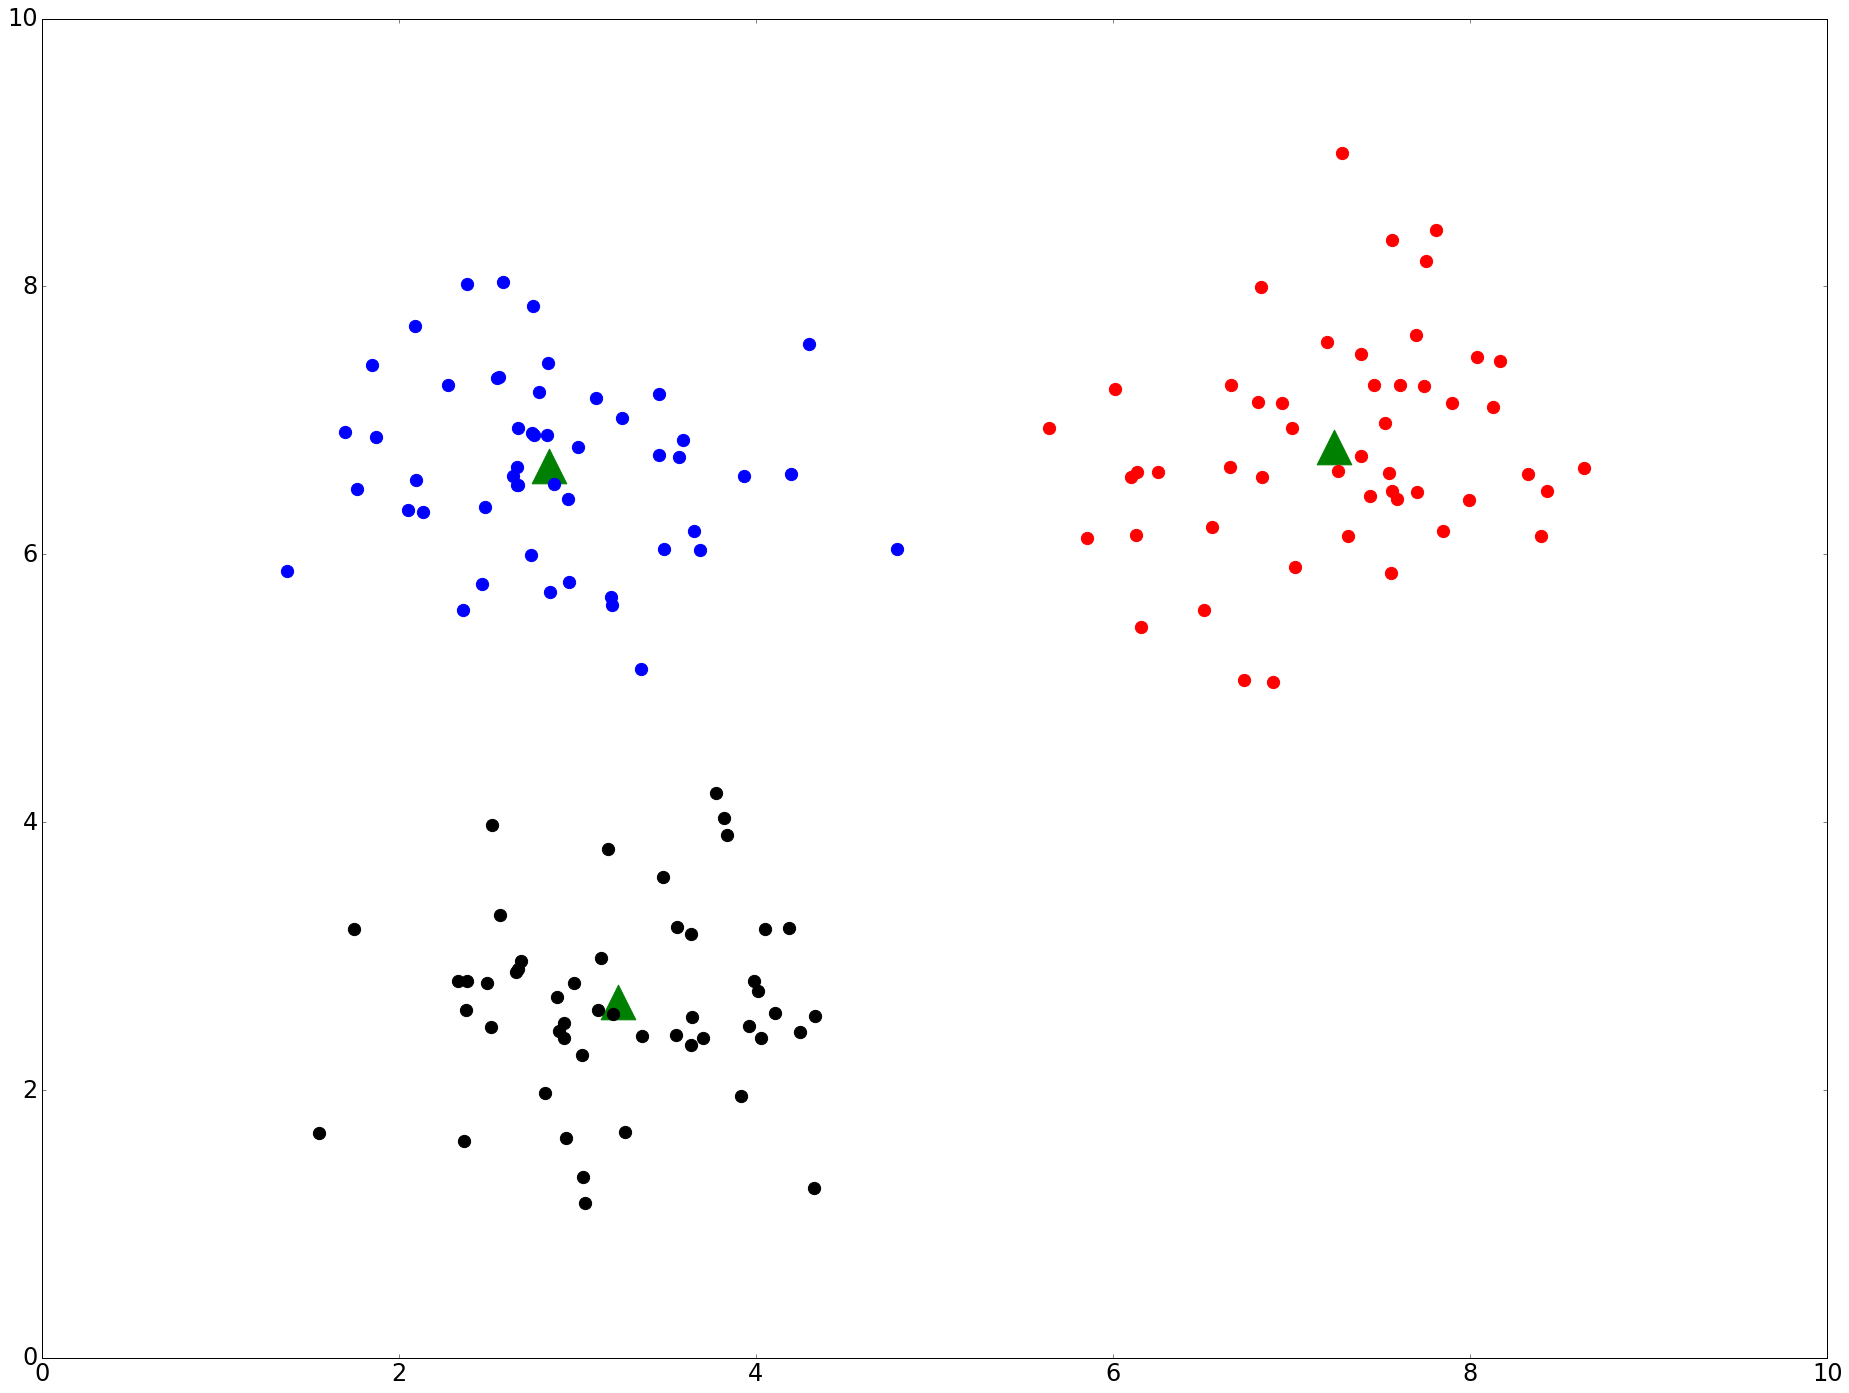

In [10]:
def kmeans(Data, NClusters):
  km = KMeans(NClusters)
  fitted = km.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

feature1 = 0
feature2 = 2

sizeTrain    = 150
sizeTest     = 1200
sizeCentroid = 1200

newTrain = train[:,[feature1, feature2]]

centers, labels, interia = kmeans(newTrain, 3)

label0 = np.where(labels == 0)
label1 = np.where(labels == 1)
label2 = np.where(labels == 2)

class0 = train[label0]
class1 = train[label1]
class2 = train[label2]

newClass0 = np.matrix(class0[:,[feature1, feature2]])
newClass1 = np.matrix(class1[:,[feature1, feature2]])
newClass2 = np.matrix(class2[:,[feature1, feature2]])

fig = plt.figure()

ax0 = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

ax0.scatter(centers[:,0], centers[:,1], marker='^', s=sizeCentroid, color='green')

ax1.scatter(newClass0[:,0], newClass0[:,1], marker='o', color='red', s=sizeTrain)
ax2.scatter(newClass1[:,0], newClass1[:,1], marker='o', color='black', s=sizeTrain)
ax3.scatter(newClass2[:,0], newClass2[:,1], marker='o', color='blue', s=sizeTrain)

pylab.ylim([0,10])
pylab.xlim([0,10])

plt.show()

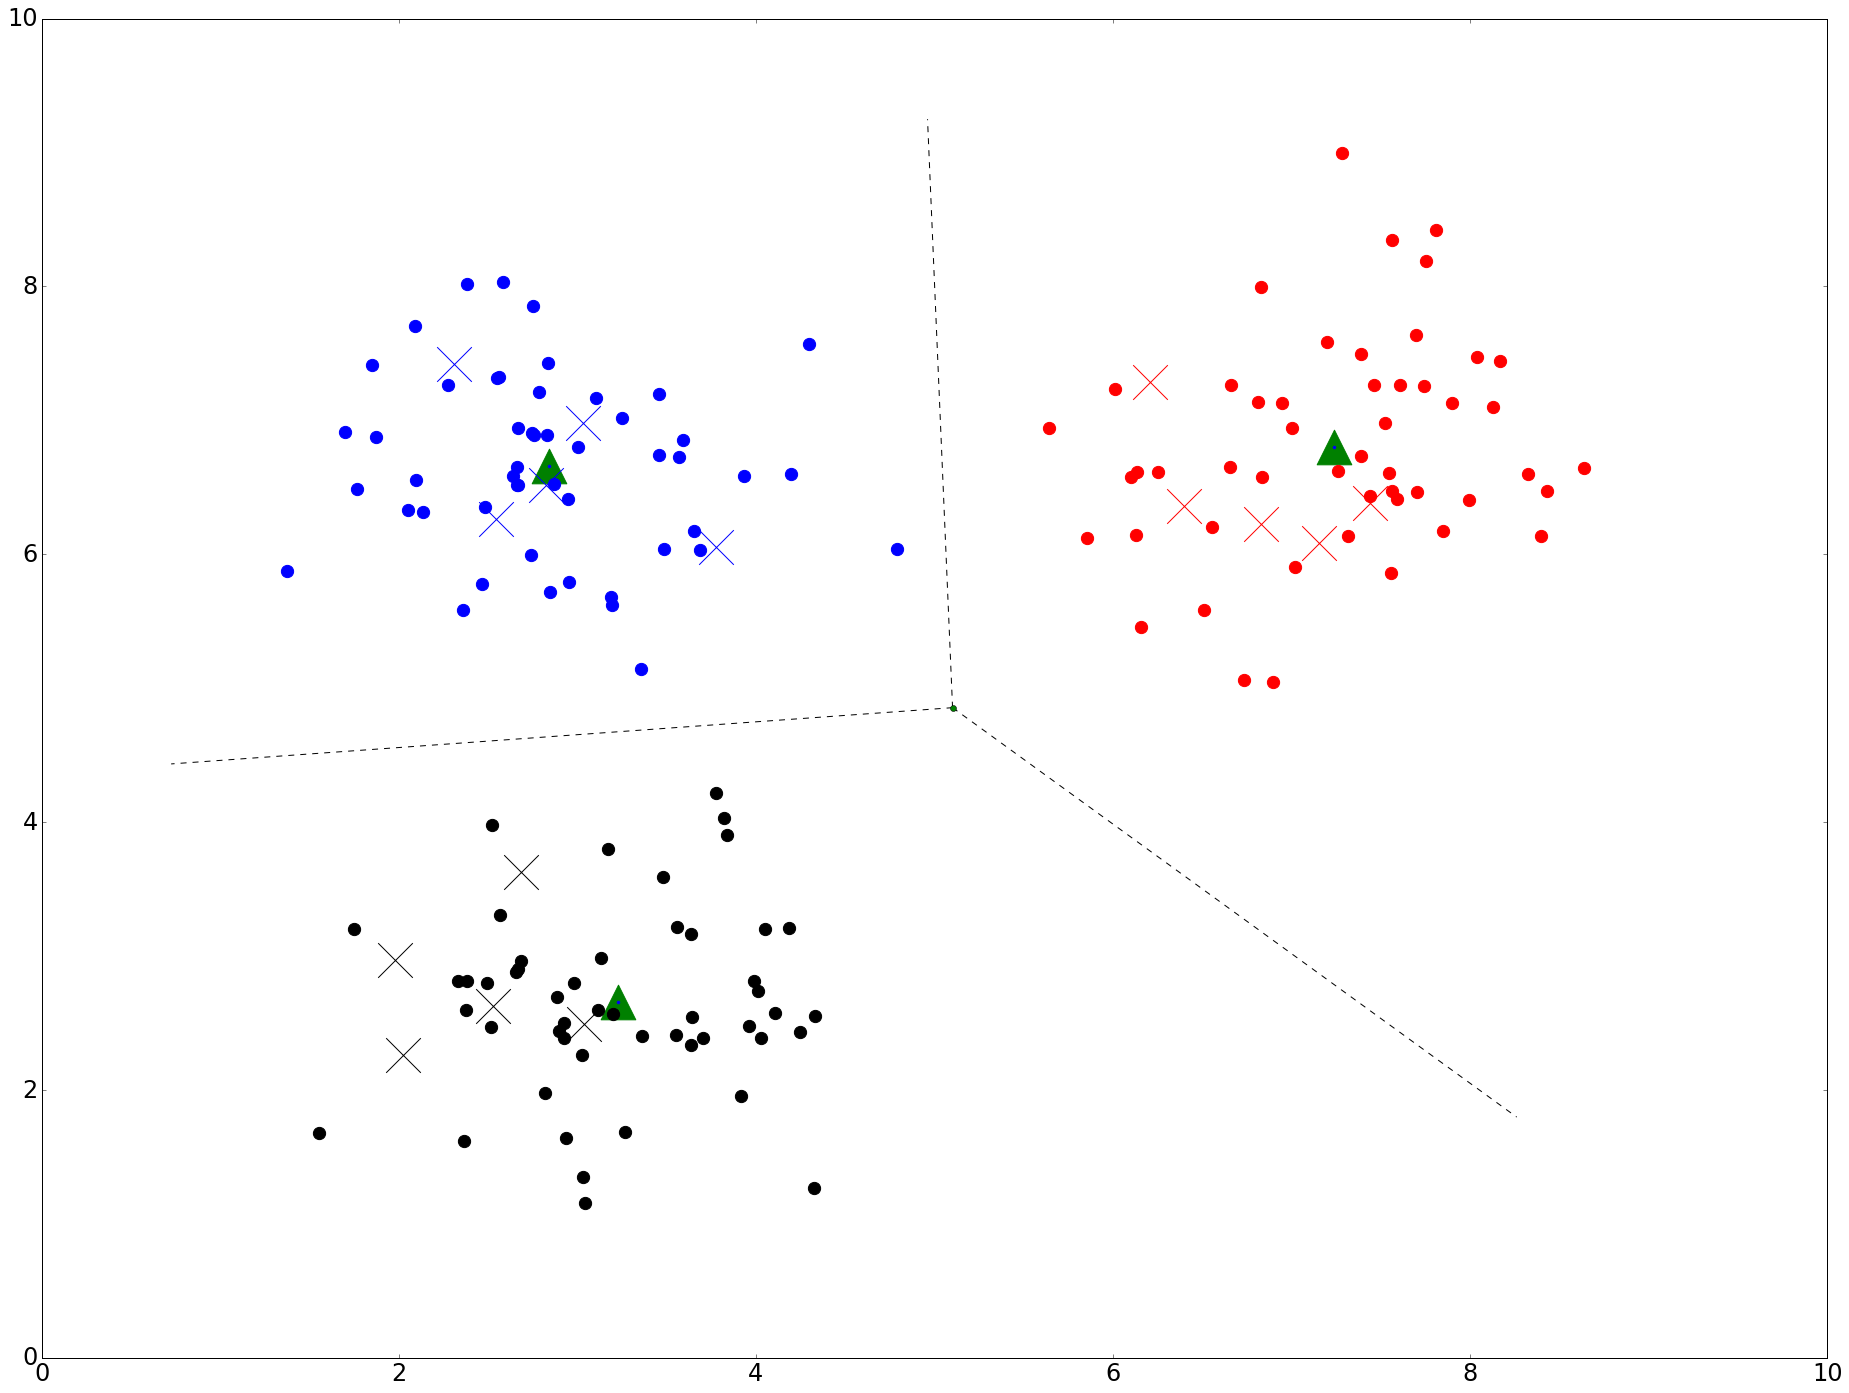

In [11]:
newTest = test[:,[feature1, feature2]]

dists = cdist(newTest, centers, metric='euclidean', p=2)
testLabels = np.argmin(dists, axis=1)

testLabel0 = np.where(testLabels == 0)
testLabel1 = np.where(testLabels == 1)
testLabel2 = np.where(testLabels == 2)

testClass0 = np.matrix(test[testLabel0])
testClass1 = np.matrix(test[testLabel1])
testClass2 = np.matrix(test[testLabel2])

newTestClass0 = np.matrix(testClass0[:,[feature1, feature2]])
newTestClass1 = np.matrix(testClass1[:,[feature1, feature2]])
newTestClass2 = np.matrix(testClass2[:,[feature1, feature2]])

fig = plt.figure()

ax0 = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)
ax5 = fig.add_subplot(111)
ax6 = fig.add_subplot(111)

ax0.scatter(centers[:,0], centers[:,1], marker='^', s=sizeCentroid, color='green')

ax1.scatter(newClass0[:,0], newClass0[:,1], marker='o', color='red', s=sizeTrain)
ax2.scatter(newClass1[:,0], newClass1[:,1], marker='o', color='black', s=sizeTrain)
ax3.scatter(newClass2[:,0], newClass2[:,1], marker='o', color='blue', s=sizeTrain)

ax4.scatter(newTestClass0[:,0], newTestClass0[:,1], marker='x', color='red', s=sizeTest)
ax5.scatter(newTestClass1[:,0], newTestClass1[:,1], marker='x', color='black', s=sizeTest)
ax6.scatter(newTestClass2[:,0], newTestClass2[:,1], marker='x', color='blue', s=sizeTest)

voronoi_plot_2d(Voronoi(centers), ax=ax0)

pylab.ylim([0,10])
pylab.xlim([0,10])

plt.show()

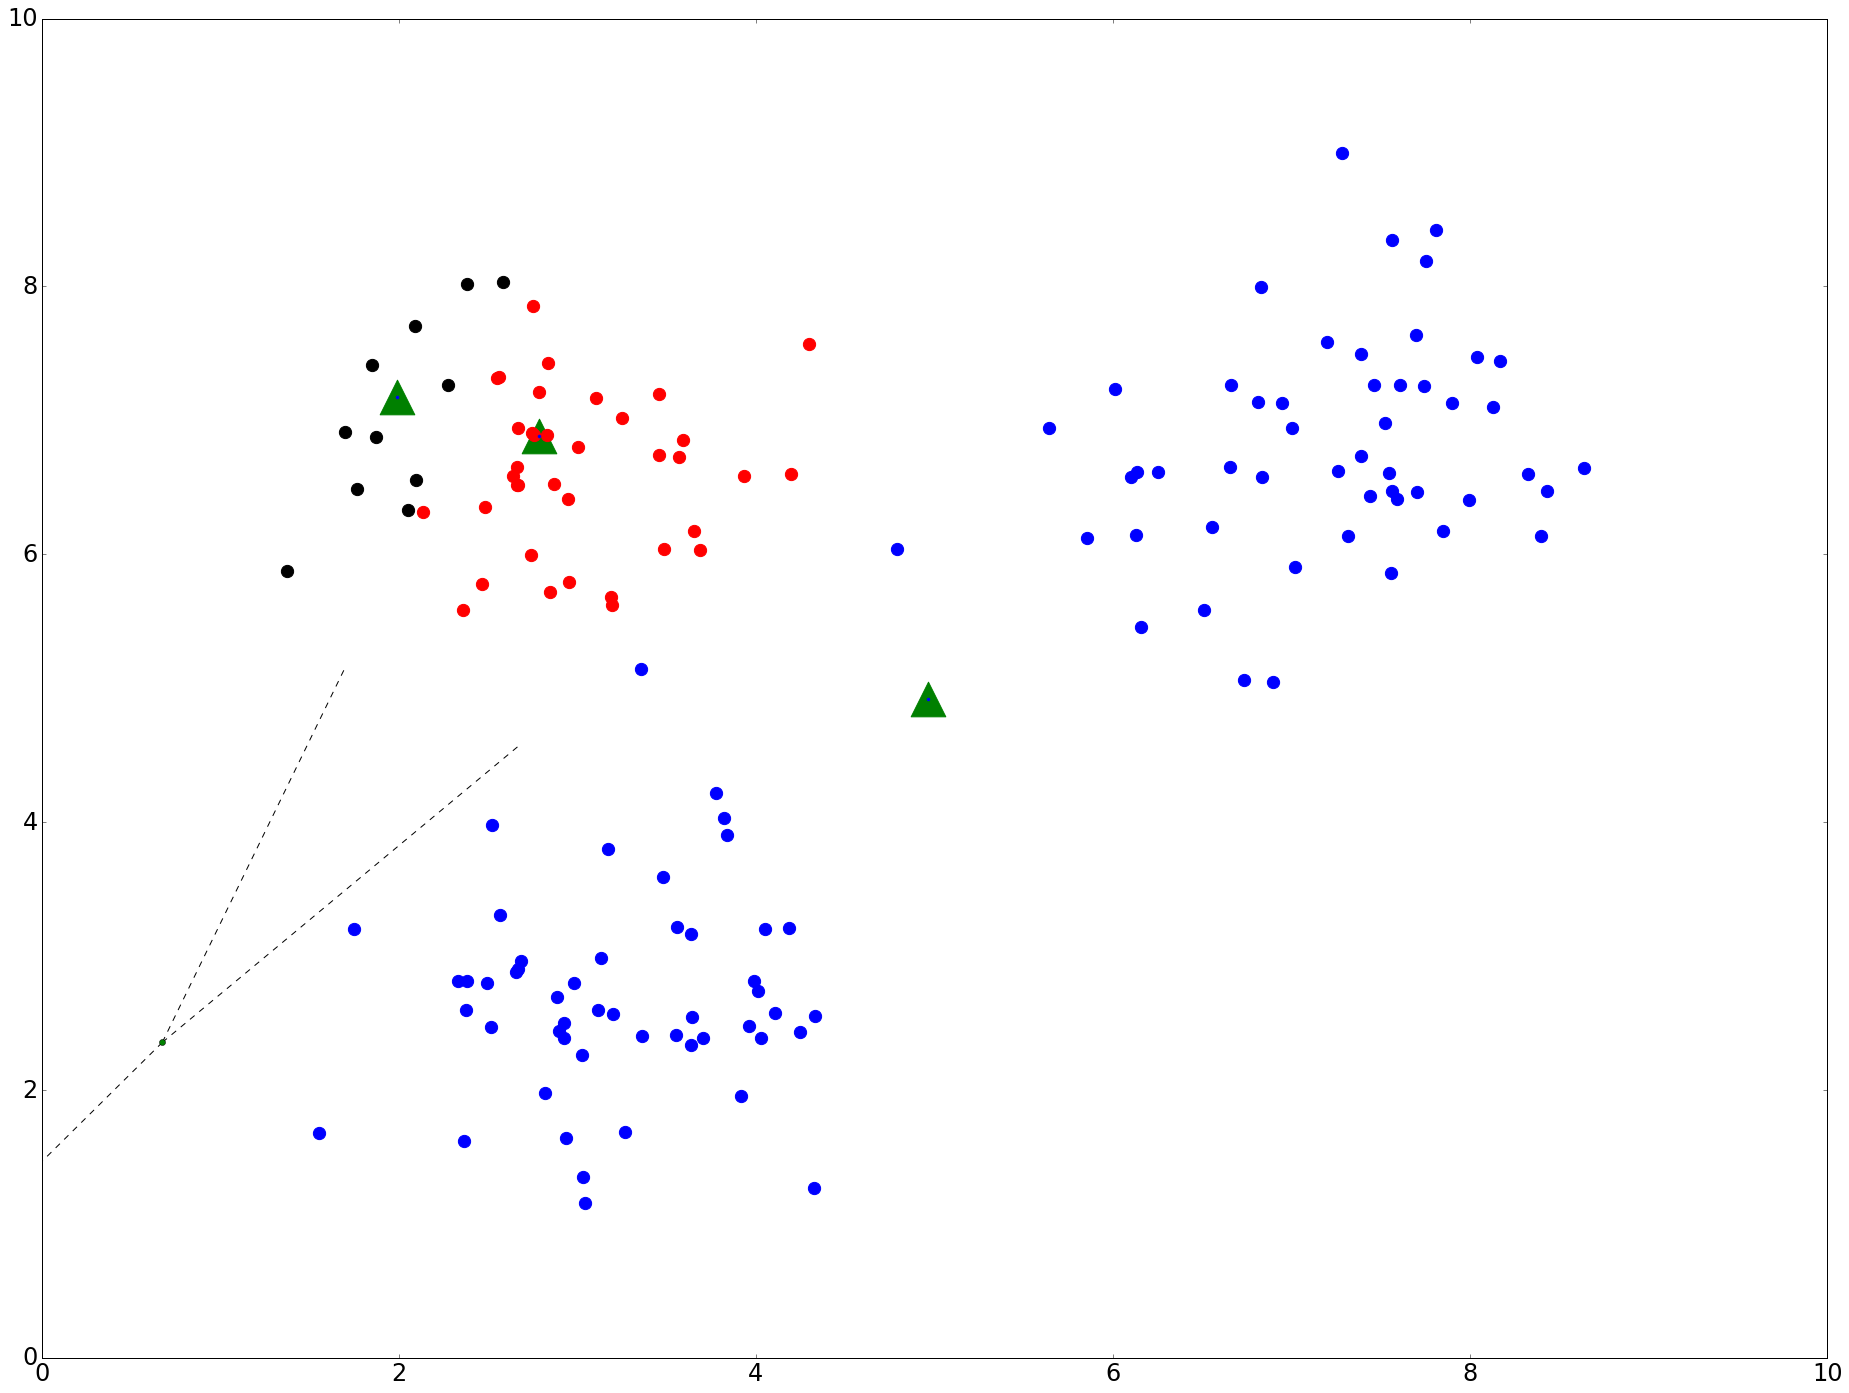

In [12]:
def badkmeans(Data, NClusters):
  km = KMeans(NClusters, max_iter=1, n_init=1, init='random')
  fitted = km.fit(Data)
  while (fitted.inertia_ < 700):
    km1 = KMeans(NClusters, max_iter=1, n_init=1, init='random')
    fitted = km1.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

badCenters, badLabel, badInteria = badkmeans(newTrain, 3)

badLabel0 = np.where(badLabel == 0)
badLabel1 = np.where(badLabel == 1)
badLabel2 = np.where(badLabel == 2)

badClass0 = train[badLabel0]
badClass1 = train[badLabel1]
badClass2 = train[badLabel2]

newBadClass0 = np.matrix(badClass0[:,[feature1, feature2]])
newBadClass1 = np.matrix(badClass1[:,[feature1, feature2]])
newBadClass2 = np.matrix(badClass2[:,[feature1, feature2]])

fig = plt.figure()

ax0 = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)
ax5 = fig.add_subplot(111)
ax6 = fig.add_subplot(111)

ax0.scatter(badCenters[:,0], badCenters[:,1], marker='^', s=sizeCentroid, color='green')

ax1.scatter(newBadClass0[:,0], newBadClass0[:,1], marker='o', color='red', s=sizeTrain)
ax2.scatter(newBadClass1[:,0], newBadClass1[:,1], marker='o', color='black', s=sizeTrain)
ax3.scatter(newBadClass2[:,0], newBadClass2[:,1], marker='o', color='blue', s=sizeTrain)

voronoi_plot_2d(Voronoi(badCenters), ax=ax0)

pylab.ylim([0,10])
pylab.xlim([0,10])

plt.show()

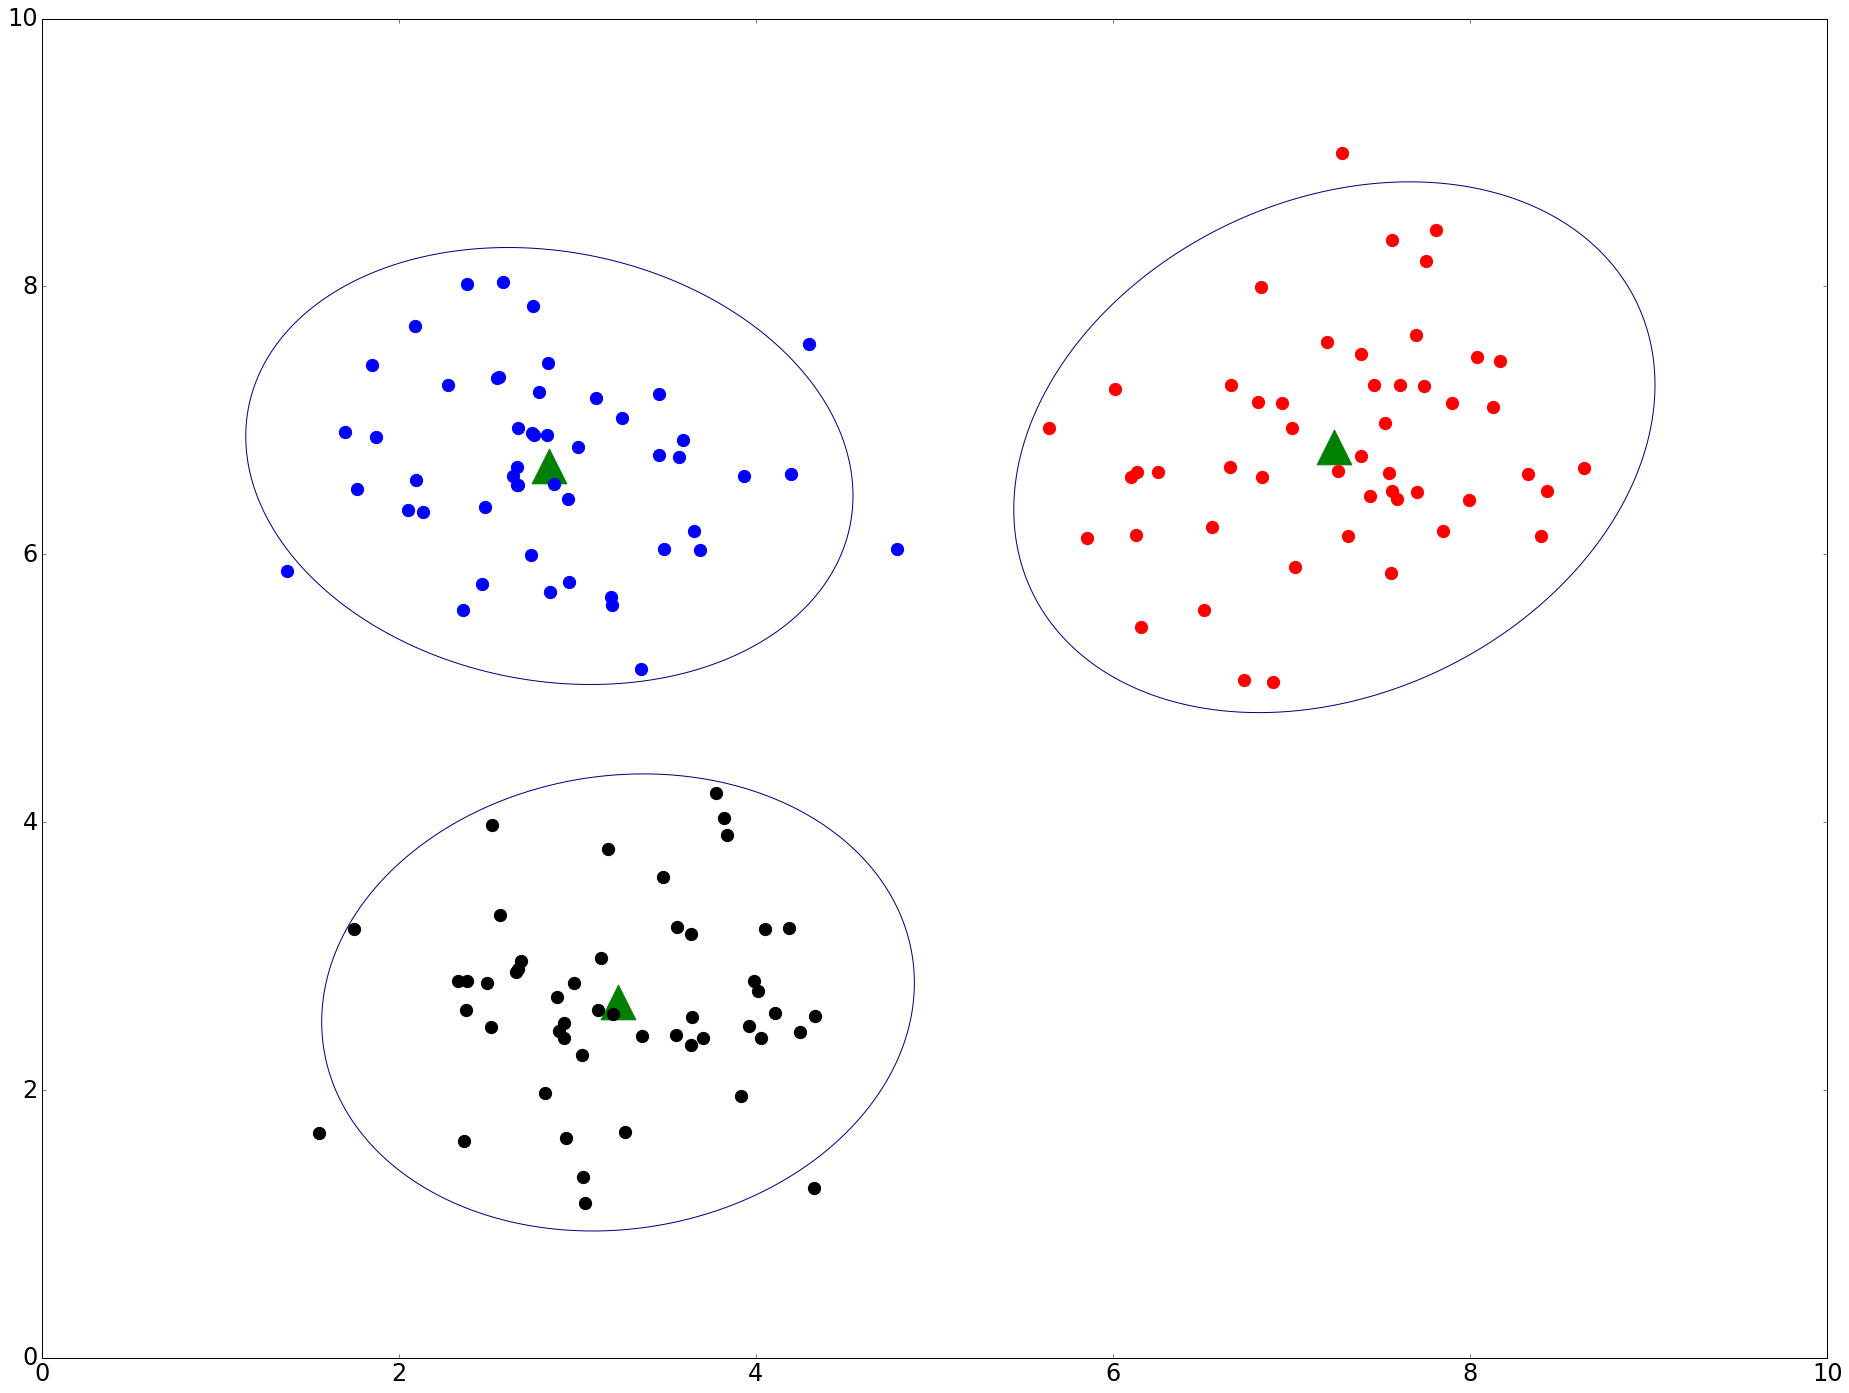

In [13]:
def computeMass(cov):
  return [np.exp(-3) * ((2*np.pi)**2 * np.linalg.det(cov))**(-0.5)]

def PDFs(means, covs, grid):
    pdfs = []
    for i in range(len(covs)):
        pdf = stats.multivariate_normal.pdf(grid, means[i], covs[i]).reshape(1000,1000)
        pdfs.append(pdf)
    return pdfs

meanClass0 = np.squeeze(np.array(np.mean(newClass0, axis=0)))
meanClass1 = np.squeeze(np.array(np.mean(newClass1, axis=0)))
meanClass2 = np.squeeze(np.array(np.mean(newClass2, axis=0)))

covClass0 = np.cov(newClass0, rowvar=0)
covClass1 = np.cov(newClass1, rowvar=0)
covClass2 = np.cov(newClass2, rowvar=0)

xval = np.linspace(0,10,1000)
    
(grid1, grid2) = np.meshgrid(xval, xval)

grid1 = grid1.flatten()
grid2 = grid2.flatten()

grid = np.column_stack((grid1, grid2))

massCovClass0 = computeMass(covClass0)
massCovClass1 = computeMass(covClass1)
massCovClass2 = computeMass(covClass2)

clusterClasses = [newClass0, newClass1, newClass2]
clusterMeans   = [meanClass0, meanClass1, meanClass2]
clusterCovs    = [covClass0, covClass1, covClass2]
clusterMasses  = [massCovClass0, massCovClass1, massCovClass2]

allPDFs = PDFs(clusterMeans, clusterCovs, grid)

fig = plt.figure()

ax0 = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

ax0.scatter(centers[:,0], centers[:,1], marker='^', s=sizeCentroid, color='green')

ax1.scatter(newClass0[:,0], newClass0[:,1], marker='o', color='red', s=sizeTrain)
ax2.scatter(newClass1[:,0], newClass1[:,1], marker='o', color='black', s=sizeTrain)
ax3.scatter(newClass2[:,0], newClass2[:,1], marker='o', color='blue', s=sizeTrain)

plt.contour(xval, xval, allPDFs[0], clusterMasses[0])
plt.contour(xval, xval, allPDFs[1], clusterMasses[1])
plt.contour(xval, xval, allPDFs[2], clusterMasses[2])

pylab.ylim([0,10])
pylab.xlim([0,10])

plt.show()

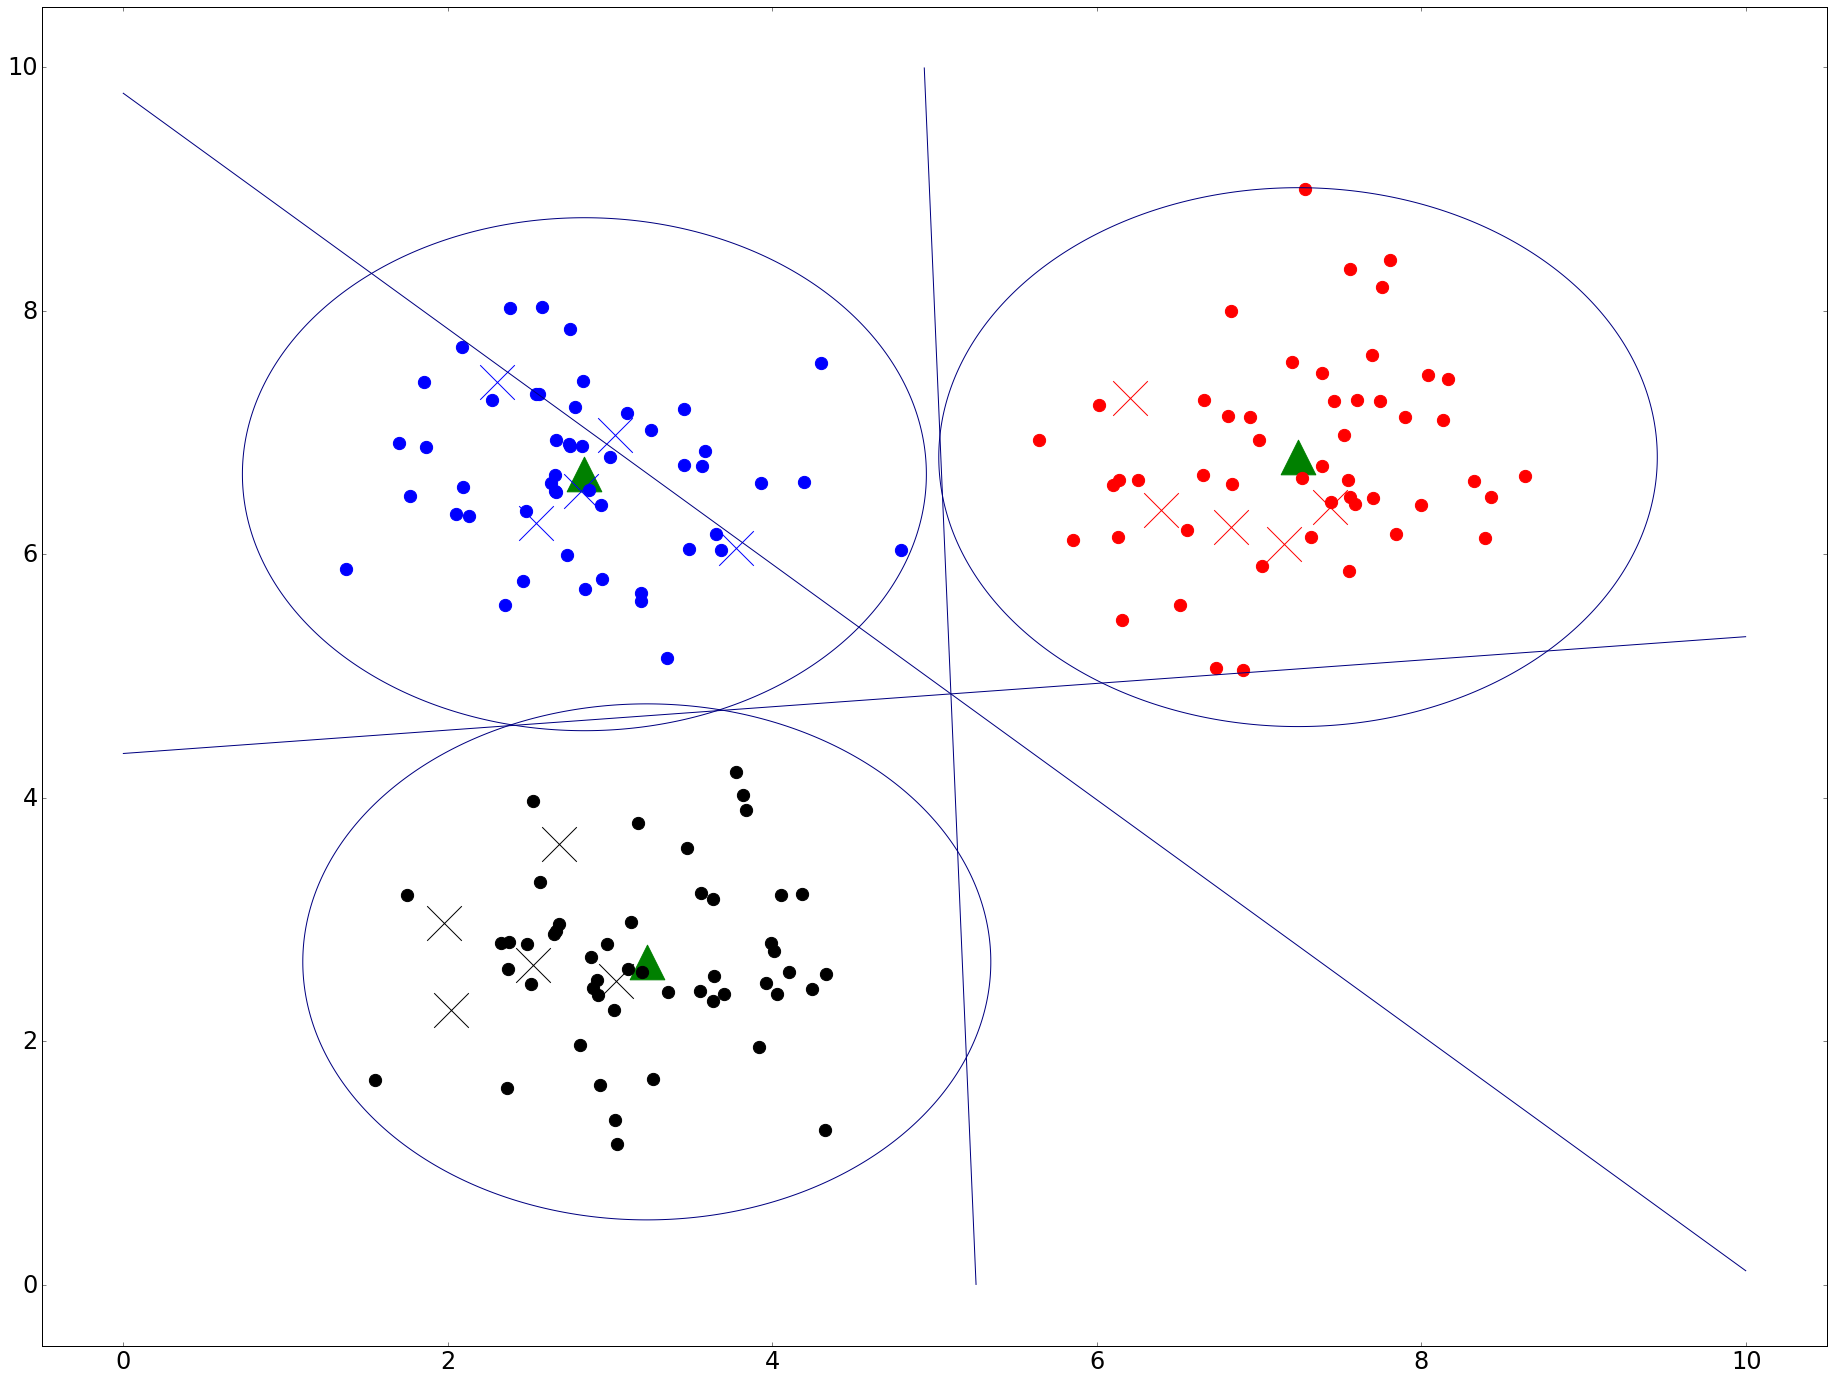

In [14]:
identityMatrix = np.identity(2)
clusterIdentities = [identityMatrix, identityMatrix, identityMatrix]
linearPDFs = PDFs(clusterMeans, clusterIdentities, grid)

fig = plt.figure()

ax0 = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)
ax5 = fig.add_subplot(111)
ax6 = fig.add_subplot(111)

ax0.scatter(centers[:,0], centers[:,1], marker='^', s=sizeCentroid, color='green')

ax1.scatter(newClass0[:,0], newClass0[:,1], marker='o', color='red', s=sizeTrain)
ax2.scatter(newClass1[:,0], newClass1[:,1], marker='o', color='black', s=sizeTrain)
ax3.scatter(newClass2[:,0], newClass2[:,1], marker='o', color='blue', s=sizeTrain)

ax4.scatter(newTestClass0[:,0], newTestClass0[:,1], marker='x', color='red', s=sizeTest)
ax5.scatter(newTestClass1[:,0], newTestClass1[:,1], marker='x', color='black', s=sizeTest)
ax6.scatter(newTestClass2[:,0], newTestClass2[:,1], marker='x', color='blue', s=sizeTest)

oneAndTwo = np.divide(linearPDFs[0], linearPDFs[1])
oneAndThree = np.divide(linearPDFs[0], linearPDFs[2])
twoAndThree = np.divide(linearPDFs[1], linearPDFs[2])

plt.contour(xval, xval, oneAndTwo, [1])
plt.contour(xval, xval, oneAndThree, [1])
plt.contour(xval, xval, twoAndThree, [1])

plt.contour(xval,xval, linearPDFs[0], clusterMasses[0])
plt.contour(xval,xval, linearPDFs[1], clusterMasses[1])
plt.contour(xval,xval, linearPDFs[2], clusterMasses[2])

plt.show()